In [128]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import random

- MNIST 데이터 로딩

In [129]:
mnist = input_data.read_data_sets('./', one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


- hyperparameter 설정

In [130]:
lr = 0.01
training_epoch=100
batch_size=100
display_step = 4
input_nx = 28*28
classes = 10

In [131]:
tf.reset_default_graph()

In [132]:
X = tf.placeholder('float', [None, input_nx])
Y = tf.placeholder('float', [None, classes])

In [133]:
W = tf.Variable(tf.zeros([input_nx, classes]))
b = tf.Variable(tf.zeros([classes]))

In [134]:
activation = tf.nn.softmax(tf.matmul(X, W)+b)

In [135]:
cost = tf.reduce_mean(-tf.reduce_mean(Y*tf.log(activation)+(1-Y)*tf.log(1-activation), reduction_indices=1))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)
init = tf.global_variables_initializer()

In [136]:
correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(Y,1))
error_rate = 1. - tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [137]:
error_rate_train= []
error_rate_test =[]

In [138]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epoch):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += sess.run(cost, feed_dict={X:batch_xs, Y:batch_ys})/total_batch
            
        error_rate_train.append(error_rate.eval({X:mnist.train.images, Y:mnist.train.labels}))
        error_rate_test.append(error_rate.eval({X:mnist.test.images, Y:mnist.test.labels}))
            
        if epoch % display_step == 0 :
            print("epoch: {:3}, avg_cost: {:1.2}, training error: {:1.2}, testing error:{:1.2}".
                  format(epoch+1, 
                         avg_cost, 
                         error_rate.eval({X:mnist.train.images, Y:mnist.train.labels}),
                         error_rate.eval({X:mnist.test.images, Y:mnist.test.labels})
                 )
            )
            
    
    print("--"*30)
    r = random.randint(0, mnist.test.num_examples-1)
    print("label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)) )
    print("predict:", sess.run(tf.argmax(activation, 1), feed_dict={X:mnist.test.images[r:r+1]}))

epoch:   1, avg_cost: 0.2921, training error: 0.255, testing error:0.246
epoch:   5, avg_cost: 0.1571, training error: 0.18, testing error:0.169
epoch:   9, avg_cost: 0.1192, training error: 0.156, testing error:0.145
epoch:  13, avg_cost: 0.1024, training error: 0.143, testing error:0.132
epoch:  17, avg_cost: 0.09285, training error: 0.136, testing error:0.126
epoch:  21, avg_cost: 0.08657, training error: 0.13, testing error:0.121
epoch:  25, avg_cost: 0.08207, training error: 0.126, testing error:0.117
epoch:  29, avg_cost: 0.07865, training error: 0.122, testing error:0.114
epoch:  33, avg_cost: 0.07596, training error: 0.12, testing error:0.112
epoch:  37, avg_cost: 0.07375, training error: 0.117, testing error:0.109
epoch:  41, avg_cost: 0.07191, training error: 0.115, testing error:0.107
epoch:  45, avg_cost: 0.07034, training error: 0.113, testing error:0.104
epoch:  49, avg_cost: 0.06899, training error: 0.111, testing error:0.103
epoch:  53, avg_cost: 0.0678, training error:

In [139]:
import matplotlib.pyplot as plt

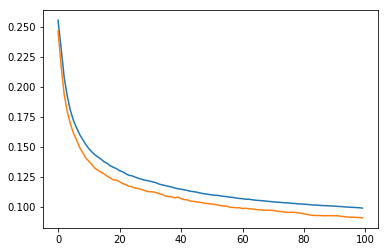

In [140]:
plt.plot(error_rate_train)
plt.plot(error_rate_test)
plt.ylabel("r")
plt.show()